In [ ]:
# Check for GPU
!nvidia-smi

Mon Apr 18 22:14:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.9.0+cu126


'cuda'

In [3]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from pathlib import Path

In [6]:
# Get training data
data_dir = Path("../data")
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 5.00G/5.00G [04:09<00:00, 20.0MB/s]


In [7]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [8]:
classes = train_data.classes
classes[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

churros


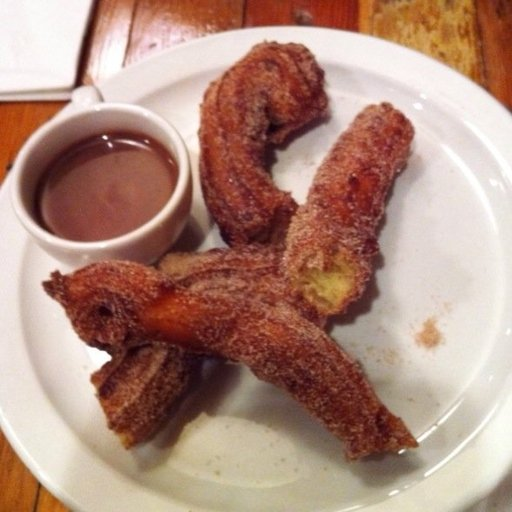

In [10]:
print(classes[train_data[0][1]])
train_data[0][0]

In [34]:
#Getting random 30% of the training images
import random

image_path = data_dir /"food-101" / "images"
target_classes = classes[:10]
data_splits = ["train", "test"]
subset = 0.3
random.seed(42)
# Getting the labels

label_splits = {}

for data_split in data_splits:
  print(f"[INFO] Creating image split for: {data_split}...")
  label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
  with open(label_path, "r") as f:
    labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

# Get random subset of target classes image ID's
  number_to_sample = round(subset * len(labels))
  print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
  sampled_images = random.sample(labels, k=number_to_sample)

# Apply full paths
  image_paths = [Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
  label_splits[data_split] = image_paths

label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 2250 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 750 images for test...


[PosixPath('../data/food-101/images/beignets/967268.jpg'),
 PosixPath('../data/food-101/images/baby_back_ribs/1684592.jpg'),
 PosixPath('../data/food-101/images/apple_pie/2023705.jpg'),
 PosixPath('../data/food-101/images/bread_pudding/1246965.jpg'),
 PosixPath('../data/food-101/images/beef_carpaccio/102840.jpg'),
 PosixPath('../data/food-101/images/baklava/3373814.jpg'),
 PosixPath('../data/food-101/images/baklava/2435600.jpg'),
 PosixPath('../data/food-101/images/baby_back_ribs/2767083.jpg'),
 PosixPath('../data/food-101/images/bread_pudding/1105735.jpg'),
 PosixPath('../data/food-101/images/baby_back_ribs/1416598.jpg')]

In [39]:
# Create target directory path
target_dir_name = f"../data/food101_{str(int(subset*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../data/food101_30_percent'


In [40]:
import shutil

for image_split in label_splits.keys():
    for img_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / img_path.parent.stem / img_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {img_path} to {dest_dir}...")
        shutil.copy2(img_path, dest_dir)

[INFO] Copying ../data/food-101/images/beignets/967268.jpg to ../data/food101_30_percent/train/beignets/967268.jpg...
[INFO] Copying ../data/food-101/images/baby_back_ribs/1684592.jpg to ../data/food101_30_percent/train/baby_back_ribs/1684592.jpg...
[INFO] Copying ../data/food-101/images/apple_pie/2023705.jpg to ../data/food101_30_percent/train/apple_pie/2023705.jpg...
[INFO] Copying ../data/food-101/images/bread_pudding/1246965.jpg to ../data/food101_30_percent/train/bread_pudding/1246965.jpg...
[INFO] Copying ../data/food-101/images/beef_carpaccio/102840.jpg to ../data/food101_30_percent/train/beef_carpaccio/102840.jpg...
[INFO] Copying ../data/food-101/images/baklava/3373814.jpg to ../data/food101_30_percent/train/baklava/3373814.jpg...
[INFO] Copying ../data/food-101/images/baklava/2435600.jpg to ../data/food101_30_percent/train/baklava/2435600.jpg...
[INFO] Copying ../data/food-101/images/baby_back_ribs/2767083.jpg to ../data/food101_30_percent/train/baby_back_ribs/2767083.jpg...


In [41]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/food101_30_percent'.
There are 10 directories and 0 images in '../data/food101_30_percent/test'.
There are 0 directories and 88 images in '../data/food101_30_percent/test/beef_tartare'.
There are 0 directories and 78 images in '../data/food101_30_percent/test/beet_salad'.
There are 0 directories and 76 images in '../data/food101_30_percent/test/baklava'.
There are 0 directories and 71 images in '../data/food101_30_percent/test/beef_carpaccio'.
There are 0 directories and 76 images in '../data/food101_30_percent/test/bread_pudding'.
There are 0 directories and 66 images in '../data/food101_30_percent/test/baby_back_ribs'.
There are 0 directories and 74 images in '../data/food101_30_percent/test/beignets'.
There are 0 directories and 64 images in '../data/food101_30_percent/test/apple_pie'.
There are 0 directories and 81 images in '../data/food101_30_percent/test/bibimbap'.
There are 0 directories and 76 images in '../data/food101_30_perce

In [78]:
# Setup train and testing paths
train_dir = target_dir / "train"
test_dir = target_dir / "test"

train_dir, test_dir

(PosixPath('../data/food101_30_percent/train'),
 PosixPath('../data/food101_30_percent/test'))

Image Class:bread_pudding


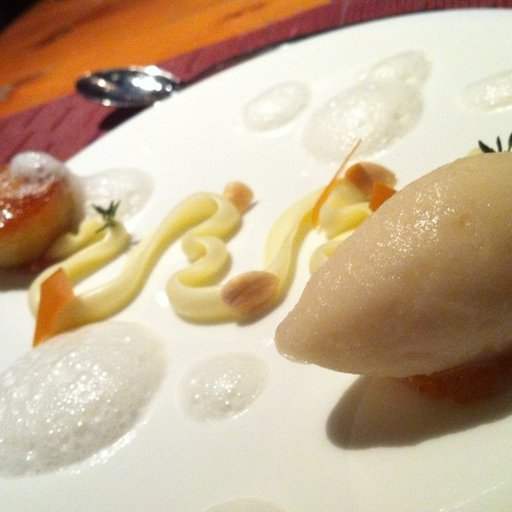

In [80]:
# Visualize an image
from PIL import Image
img = image_paths[1]
label = img.parent.stem
image = Image.open(img)
print(f"Image Class:{label}")
image

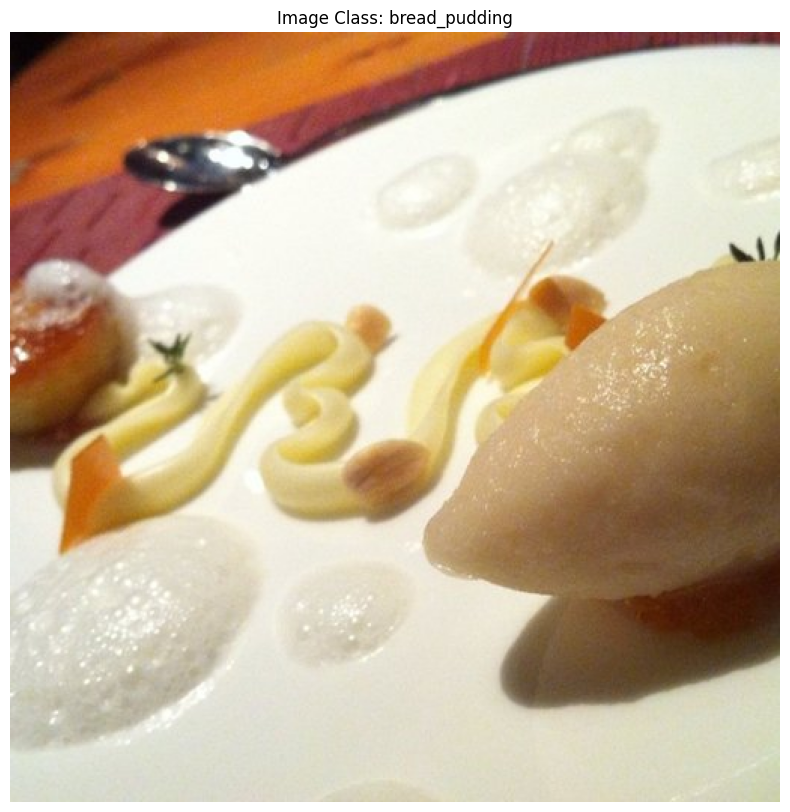

In [57]:
# Do the image visualization with matplotlib
import matplotlib.pyplot as plt
import numpy as np

new_img = np.asarray(image)
plt.figure(figsize=(10,10))
plt.title(f"Image Class: {label}")
plt.imshow(new_img)
plt.axis(False);

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [58]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [97]:
# Write transform for turning images into tensors
train_transform = transforms.Compose([transforms.Resize(size=(128,128)),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size=(128,128)),
                                     transforms.ToTensor()])

In [72]:
# Write a function to plot transformed images
def plot_timage(imgpath, transform):
  image = Image.open(imgpath)
  timage = transform(image).permute(1,2,0)

  fig, ax = plt.subplots(1,2)
  ax[0].imshow(image)
  ax[0].set_title(f"Original Image")
  ax[0].axis(False)

  ax[1].imshow(timage)
  ax[1].set_title(f"Transformed Image")
  ax[1].axis(False)

  fig.suptitle(f"Image Class:{imgpath.parent.stem}")


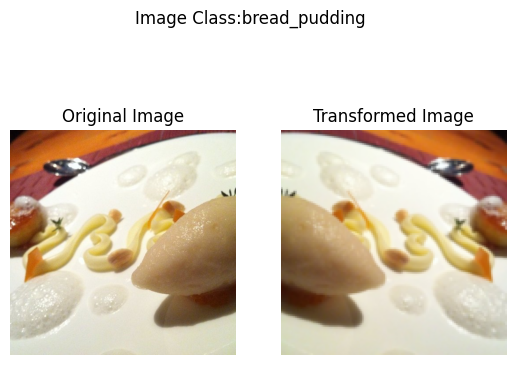

In [73]:
  plot_timage(img, train_transform)

### Load image data using `ImageFolder`

In [98]:
# Use ImageFolder to create dataset(s)
train_dataset = datasets.ImageFolder(train_dir, train_transform)
test_dataset = datasets.ImageFolder(test_dir, test_transform)

train_dataset, test_dataset

(Dataset ImageFolder
     Number of datapoints: 2250
     Root location: ../data/food101_30_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 750
     Root location: ../data/food101_30_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [92]:
# Get class names as a list
class_names = train_dataset.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [93]:
# Can also get class names as a dict
class_dict = train_dataset.class_to_idx
class_dict

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9}

In [94]:
# Check the lengths of each dataset
len(train_dataset), len(test_dataset)

(2250, 750)

In [99]:
# Turn train and test Datasets into DataLoaders

BATCHSIZE = 16
train_dataloader = DataLoader(train_dataset,
                              BATCHSIZE,
                              shuffle = True)
test_dataloader = DataLoader(test_dataset,
                             BATCHSIZE,
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ead1339acf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ead1339b020>)

In [100]:
img, label = next(iter(train_dataloader))
img.shape    #[Batch size, color channels, hight, width]

torch.Size([16, 3, 128, 128])

In [123]:
import torch
from torch import nn

class tinyVGG(nn.Module):
  def __init__(self):
    super().__init__()

    self.convBlock1 = nn.Sequential( nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size=2,stride=2))

    self.convBlock2 = nn.Sequential(nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size=2))

    self.classifier = nn.Sequential(nn.Flatten(),
                                    nn.Linear(in_features= 10*32*32,
                                              out_features= 10))

  def forward(self, x):
    return self.classifier(self.convBlock2(self.convBlock1(x)))

In [124]:
model0 = tinyVGG()
model0

tinyVGG(
  (convBlock1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convBlock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10240, out_features=10, bias=True)
  )
)

In [132]:
img_batch, label_batch = next(iter(train_dataloader))
img, label = img_batch[0].unsqueeze(dim=0), label_batch[0]

model0.eval()
with torch.inference_mode():
  pred = model0(img)

print(f"Output logits:\n{pred}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label}")

Output logits:
tensor([[-0.0213, -0.0074,  0.0035,  0.0189, -0.0254, -0.0270, -0.0216,  0.0238,
          0.0031,  0.0304]])

Output prediction label:
tensor([9])

Actual label:
9


## Create training and testing functions for `model_0`.

In [136]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model0, input_size= [32,3,128,128])

Layer (type:depth-idx)                   Output Shape              Param #
tinyVGG                                  [32, 10]                  --
├─Sequential: 1-1                        [32, 10, 64, 64]          --
│    └─Conv2d: 2-1                       [32, 10, 128, 128]        280
│    └─ReLU: 2-2                         [32, 10, 128, 128]        --
│    └─Conv2d: 2-3                       [32, 10, 128, 128]        910
│    └─ReLU: 2-4                         [32, 10, 128, 128]        --
│    └─MaxPool2d: 2-5                    [32, 10, 64, 64]          --
├─Sequential: 1-2                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-6                       [32, 10, 64, 64]          910
│    └─ReLU: 2-7                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-8                       [32, 10, 64, 64]          910
│    └─ReLU: 2-9                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-10                   [32, 10, 32, 32]          --
├─Sequentia

In [145]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.to(device)
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batches, (X,y) in enumerate(train_dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)


    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(train_dataloader)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [146]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():

    # Loop through DataLoader batches
    for batches, (X,y) in enumerate(test_dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss.item()
      # Calculate and accumulate accuracy
      test_pred_labels = y_pred.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [147]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [148]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(),
                             lr=0.001)

train(model0, train_dataloader, test_dataloader, optimizer, loss_fn, epochs = 5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3061 | train_acc: 0.0115 | test_loss: 2.3025 | test_acc: 0.1077
Epoch: 2 | train_loss: 2.3030 | train_acc: 0.0120 | test_loss: 2.2995 | test_acc: 0.1197
Epoch: 3 | train_loss: 2.2668 | train_acc: 0.0159 | test_loss: 2.1550 | test_acc: 0.2074
Epoch: 4 | train_loss: 2.1241 | train_acc: 0.0255 | test_loss: 2.0999 | test_acc: 0.2473
Epoch: 5 | train_loss: 1.9925 | train_acc: 0.0332 | test_loss: 1.9478 | test_acc: 0.3098


{'train_loss': [2.3060578082470182,
  2.3030268959965268,
  2.266803137799527,
  2.1241314673254674,
  1.9924737384133304],
 'train_acc': [0.011468236004225132,
  0.012021528092148275,
  0.01594487198833056,
  0.02545143604446455,
  0.033247824556108835],
 'test_loss': [2.302509277424914,
  2.2995140501793396,
  2.1550468662951854,
  2.0998832697563983,
  1.9478462858402983],
 'test_acc': [0.1077127659574468,
  0.1196808510638298,
  0.2074468085106383,
  0.2473404255319149,
  0.3098404255319149]}

In [152]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(),
                             lr=0.001)
train(model0, train_dataloader, test_dataloader, optimizer, loss_fn, epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.7765 | train_acc: 0.0435 | test_loss: 1.9105 | test_acc: 0.3393
Epoch: 2 | train_loss: 1.6582 | train_acc: 0.0492 | test_loss: 1.9295 | test_acc: 0.3250
Epoch: 3 | train_loss: 1.5511 | train_acc: 0.0531 | test_loss: 1.9291 | test_acc: 0.3408
Epoch: 4 | train_loss: 1.4140 | train_acc: 0.0591 | test_loss: 2.0157 | test_acc: 0.3182
Epoch: 5 | train_loss: 1.2176 | train_acc: 0.0677 | test_loss: 2.0743 | test_acc: 0.3260
Epoch: 6 | train_loss: 1.2059 | train_acc: 0.0678 | test_loss: 2.0935 | test_acc: 0.3317
Epoch: 7 | train_loss: 1.0050 | train_acc: 0.0769 | test_loss: 2.5759 | test_acc: 0.3285
Epoch: 8 | train_loss: 0.8299 | train_acc: 0.0829 | test_loss: 2.7867 | test_acc: 0.3186
Epoch: 9 | train_loss: 0.7399 | train_acc: 0.0876 | test_loss: 2.8366 | test_acc: 0.3279
Epoch: 10 | train_loss: 0.6074 | train_acc: 0.0925 | test_loss: 3.2918 | test_acc: 0.2886
Epoch: 11 | train_loss: 0.4652 | train_acc: 0.0982 | test_loss: 3.6215 | test_acc: 0.2960
Epoch: 12 | train_l

{'train_loss': [1.7765205785737817,
  1.6581563416947709,
  1.551064727154184,
  1.4139685410979792,
  1.217578983898704,
  1.2059219276651423,
  1.0050037714606481,
  0.829940656398205,
  0.739911638358806,
  0.6074181510835674,
  0.4652199188234113,
  0.3789550873668904,
  0.30140705496495496,
  0.2558698727095381,
  0.18227052259926044,
  0.14182181008397898,
  0.13929319274710847,
  0.14993093515488695,
  0.1438881704577159,
  0.11821985451491378],
 'train_acc': [0.043508877823047166,
  0.04919269654443947,
  0.053065741159901446,
  0.059051355565615415,
  0.06765253256878427,
  0.06775313113022488,
  0.07685730094059662,
  0.08294351390775123,
  0.08757104773401754,
  0.09250037724460553,
  0.09818419596599785,
  0.10029676575624985,
  0.10326442331874673,
  0.10442130677531329,
  0.10678537296916672,
  0.10874704491725787,
  0.10859614707509699,
  0.10829435139077528,
  0.1086464463558173,
  0.1095518334087824],
 'test_loss': [1.910456342900053,
  1.9294845094072057,
  1.92912226

In [154]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

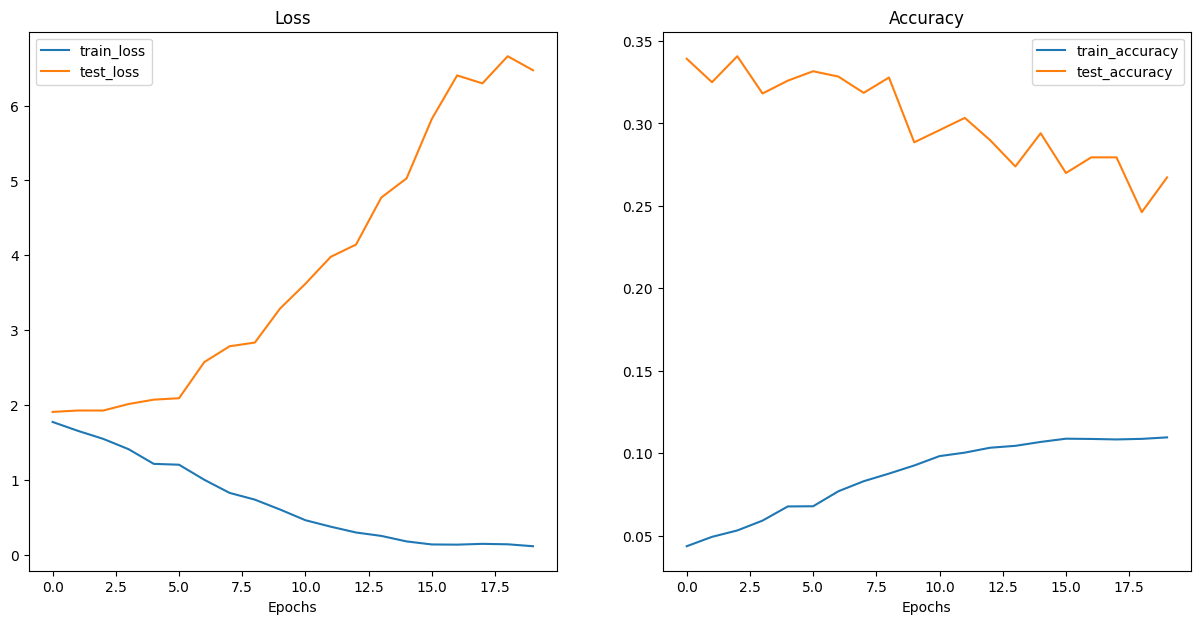

In [157]:
plot_loss_curves(model0_results)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

##  Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

In [ ]:
# See how many images we have
walk_through_dir(image_path)

Excellent, we now have double the training and testing images...

In [ ]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets


# Create dataloaders


In [ ]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## Make a prediction on your own custom image of pizza/steak/sushi 

In [ ]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)